> *Author : Oussama Oulkaid*

---

## **Getting the (wrong) picture from the data - Correlation, Causality**

Researchers measured the foot size (in cm) of a large number of students. They also gave them a dictation and counted the number of "mistakes" made by each. Data were collected on all classes in an elementary school.

---

### **0. The collected Data**

<img src="files/IMG_footSize_mistakes.jpg" style="width: 900px;">

### **1. First impression**

- The number of samples contained in this data is not big enough to make conclusions upon any pattern that might be found.
- By intuition, one might think that the feet size has nothing to do with the number of mistakes.
- But since the data were collected on all classes in an elementary school, we might assume that : 
    - **i.** the older the students, the fewer mistakes they can make ; since older (generally) means being in higher class, hence more experienced/trained with dictation.
    - **ii.** the older the students, (generally) the biggest is the size of their feet.
    
    (**i** & **ii**) $\implies$ the biggest the size of the student's feet, the fewer mistakes are expected.
    
- <span style="color:red">Improvement</span> : It will have been better if the data-set also contained the students' classes

### **2. Let's propose a graph to represent the data above**

#### **→ The first idea that came to mind is to visualize the distribution, by simply plotting the samples : $(number \ of \ mistakes = f \ (feet \ size)$**

In [7]:
"""
Import the data from a csv file, and fill the features into arrays
"""
import csv
import matplotlib.pyplot as plt
import numpy as np

feet_size = []
number_of_mistakes = []

with open('files/DATA_footSize_mistakes.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader) #skip the first row (feature labels)
    for row in reader:
        feet_size.append(float(row[0]))
        number_of_mistakes.append(float(row[1]))

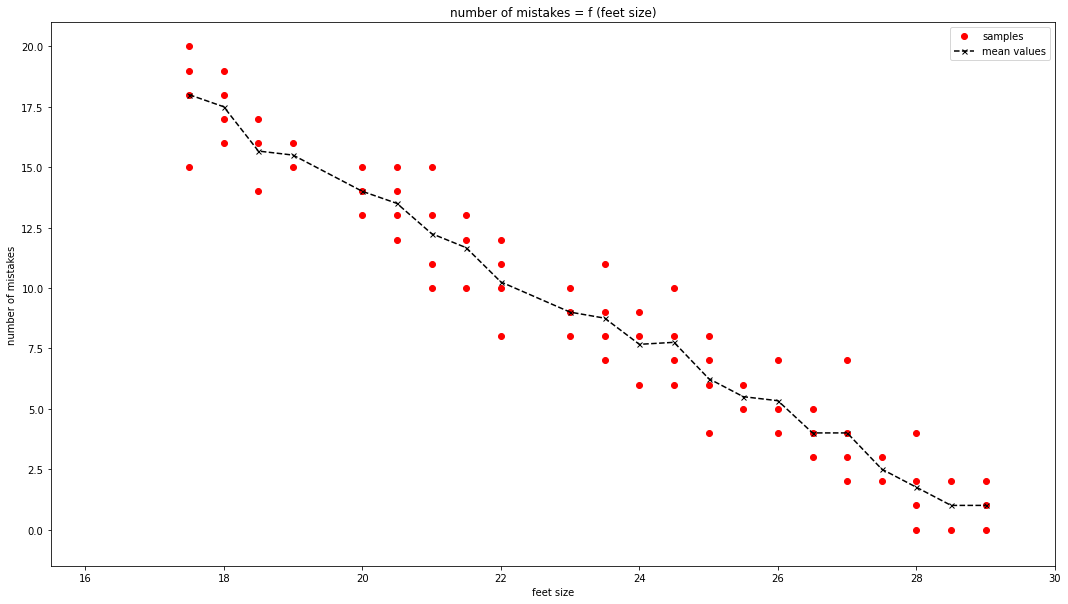

In [8]:
"""
Plot the whole samples (red dots), and draw a dashed black curve connecting the mean values of number of mistakes for each common feet size
"""
max_feet_size = np.amax(feet_size)
max_number_of_mistakes = np.amax(number_of_mistakes)

min_feet_size = np.amin(feet_size)
min_number_of_mistakes = np.amin(number_of_mistakes)

#plot the samples:
plt.subplots(1, 1, figsize = (18, 10))
plt.axis([min_feet_size-2, max_feet_size+1, min_number_of_mistakes-1.5, max_number_of_mistakes+1])
plt.plot(feet_size, number_of_mistakes, 'ro', label="samples")
plt.legend(loc="upper right")
plt.title('number of mistakes = f (feet size)')
plt.xlabel('feet size')
plt.ylabel('number of mistakes')

#plot the mean values:
number_of_mistakes_elements_means = []
feet_size_corresponding_to_elements_mean = []
for i in range(len(feet_size)):
    already_considered = False
    for k in range(0, i):
        if feet_size[k] == feet_size[i]:
            already_considered = True
            pass
    
    if not(already_considered):
        number_of_mistakes_elements = []
        number_of_mistakes_elements.append(number_of_mistakes[i])
        for j in range(i+1, len(feet_size)):
            if feet_size[j] == feet_size[i]:
                number_of_mistakes_elements.append(number_of_mistakes[j])
                
        number_of_mistakes_elements_means.append(np.mean(number_of_mistakes_elements))
        feet_size_corresponding_to_elements_mean.append(feet_size[i])
    
plt.plot(feet_size_corresponding_to_elements_mean, number_of_mistakes_elements_means, color='black', linestyle='dashed', marker='x', markerfacecolor='black', markersize=5, label="mean values")
plt.legend(loc="upper right")

plt.show()

#### **3. Complementary graphs, to understand the distribution of samples**

#### **→ Visualize the distribution of feet size values, by plotting : $feet \ size = f \ (frequency)$**

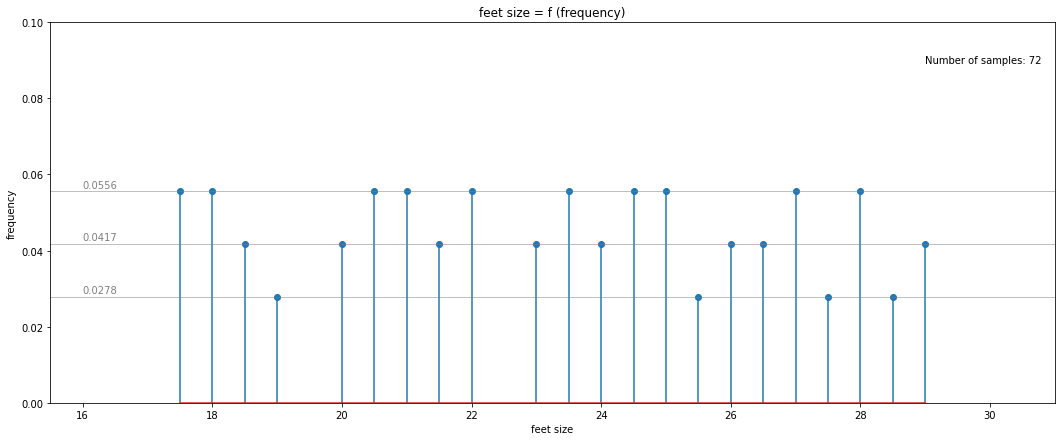

In [9]:
"""
The distribution of feet size ; frequency
"""

feet_size_REDUCED = [] #distinct values of feet size
feet_size_SAMPLES = [] #corresponding occurences
MIN_number_of_mistakes = [] #minimum number of mistakes between all feet size occurences
MAX_number_of_mistakes = [] #maximum number of mistakes between all feet size occurences

for i in range(len(feet_size)):
    if feet_size[i] not in feet_size_REDUCED:
        feet_size_REDUCED.append(feet_size[i])
        feet_size_SAMPLES.append(1) #first occurence. will have the same index as the new feet size appended value
        #min and max values correspond both to the same only found feet size occurence
        MIN_number_of_mistakes.append(number_of_mistakes[i])
        MAX_number_of_mistakes.append(number_of_mistakes[i])
    else:
        index = feet_size_REDUCED.index(feet_size[i])
        feet_size_SAMPLES[index] += 1 #new occurence
        if number_of_mistakes[i] < MIN_number_of_mistakes[index]:
            MIN_number_of_mistakes[index] = number_of_mistakes[i]
        elif number_of_mistakes[i] > MAX_number_of_mistakes[index]:
            MAX_number_of_mistakes[index] = number_of_mistakes[i]
        
feet_size_FREQUENCY = []
for i in range(len(feet_size_REDUCED)):
    feet_size_FREQUENCY.append(feet_size_SAMPLES[i] / len(feet_size))
        
max_x = np.amax(feet_size_REDUCED)
min_x = np.amin(feet_size_REDUCED)

max_y = np.amax(feet_size_FREQUENCY)
min_y = np.amin(feet_size_FREQUENCY)

plt.subplots(1, 1, figsize = (18, 7))
plt.axis([min_x-2, max_x+2, 0, 0.1]) #to change scale: plt.axis([min_x-2, max_x+2, 0, max_y*(1+0.1)])
plt.stem(feet_size_REDUCED, feet_size_FREQUENCY)
plt.title('feet size = f (frequency)')
plt.xlabel('feet size')
plt.ylabel('frequency')
plt.figtext(.8, .8, "Number of samples: %d" % len(feet_size))

feet_size_FREQUENCY_REDUCED = np.unique(feet_size_FREQUENCY)
for i in range(len(feet_size_FREQUENCY_REDUCED)):
    plt.axhline(y = feet_size_FREQUENCY_REDUCED[i], color = 'gray', linestyle = '-', linewidth=0.5)
    plt.text(min_x-1.5,feet_size_FREQUENCY_REDUCED[i]+0.001,'%.4f' % feet_size_FREQUENCY_REDUCED[i], color = 'gray')

plt.show()

#### **→ Visualize number of {number of {samples with the same feet size value}}**

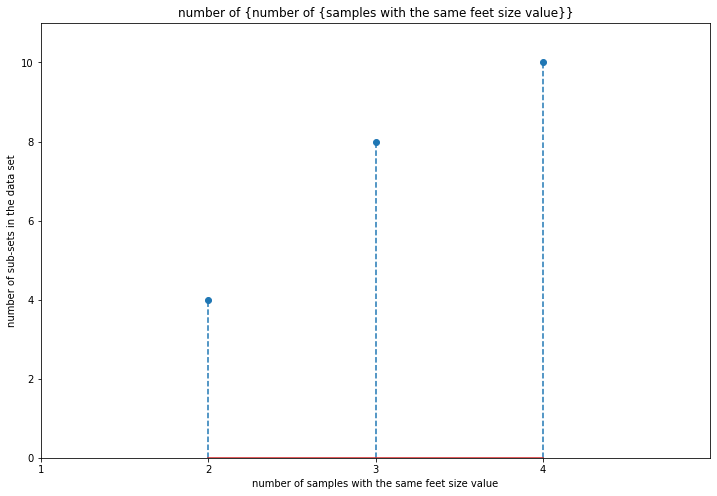

In [10]:
#how many number of "number of samples"
"""
number of {number of {samples with the same feet size value}}
"""

feet_size_SAMPLES_REDUCED = []
feet_size_SAMPLES_REDUCED_SAMPLES = []
feet_size_SAMPLES_REDUCED__number_of_mistakes_DISTANCE_MIN = []
feet_size_SAMPLES_REDUCED__number_of_mistakes_DISTANCE_MAX = []

for i in range(len(feet_size_SAMPLES)):
    if feet_size_SAMPLES[i] not in feet_size_SAMPLES_REDUCED:
        feet_size_SAMPLES_REDUCED.append(feet_size_SAMPLES[i])
        feet_size_SAMPLES_REDUCED_SAMPLES.append(1)
        distance_i = MAX_number_of_mistakes[i] - MIN_number_of_mistakes[i]
        feet_size_SAMPLES_REDUCED__number_of_mistakes_DISTANCE_MIN.append(distance_i)
        feet_size_SAMPLES_REDUCED__number_of_mistakes_DISTANCE_MAX.append(distance_i)
    else:
        index = feet_size_SAMPLES_REDUCED.index(feet_size_SAMPLES[i])
        feet_size_SAMPLES_REDUCED_SAMPLES[index] += 1 #new occurence
        distance_i = MAX_number_of_mistakes[i] - MIN_number_of_mistakes[i]
        if distance_i < feet_size_SAMPLES_REDUCED__number_of_mistakes_DISTANCE_MIN[index]:
            feet_size_SAMPLES_REDUCED__number_of_mistakes_DISTANCE_MIN[index] = distance_i
        elif distance_i > feet_size_SAMPLES_REDUCED__number_of_mistakes_DISTANCE_MAX[index]:
            feet_size_SAMPLES_REDUCED__number_of_mistakes_DISTANCE_MAX[index] = distance_i
        
max_x = np.amax(feet_size_SAMPLES_REDUCED)
min_x = np.amin(feet_size_SAMPLES_REDUCED)

max_y = np.amax(feet_size_SAMPLES_REDUCED_SAMPLES)
min_y = np.amin(feet_size_SAMPLES_REDUCED_SAMPLES)

plt.subplots(1, 1, figsize = (12, 8))

tick_labels = np.arange(1,5,1)
plt.xticks(tick_labels)

plt.axis([min_x-1, max_x+1, 0, max_y+1])
plt.stem(feet_size_SAMPLES_REDUCED, feet_size_SAMPLES_REDUCED_SAMPLES, linefmt='--')
plt.title('number of {number of {samples with the same feet size value}}')
plt.xlabel('number of samples with the same feet size value')
plt.ylabel('number of sub-sets in the data set')

plt.show()

<span style="color:green">Comment</span> : The majority elements in the data belong sets of 4 then 3 elements with the same value of feet size. A minority (4 samples) belong to a set of 2 elements.

#### **→ Identify patterns on how the distance between the number of mistakes varies with respect to the number of samples token for each value of feet size**

In [11]:
"""
Compute the distances (max_value - min_value) of number of mistakes for each sub-set represented by the number of samples (in terms of feet size value) countained in it
"""
feet_size_SAMPLES_REDUCED = []
feet_size_SAMPLES_DISTANCES = []

for i in range(len(feet_size_SAMPLES)):
    if feet_size_SAMPLES[i] not in feet_size_SAMPLES_REDUCED:
        feet_size_SAMPLES_REDUCED.append(feet_size_SAMPLES[i])
        EMPTY = []
        feet_size_SAMPLES_DISTANCES.append(EMPTY)
        
    index = feet_size_SAMPLES_REDUCED.index(feet_size_SAMPLES[i])
    distance_i = MAX_number_of_mistakes[i] - MIN_number_of_mistakes[i]
    feet_size_SAMPLES_DISTANCES[index].append(distance_i)

#re-arrange (by reversing) the arrays:
feet_size_SAMPLES_REDUCED = feet_size_SAMPLES_REDUCED[::-1]
feet_size_SAMPLES_DISTANCES = feet_size_SAMPLES_DISTANCES[::-1]

print("feet_size_SAMPLES_REDUCED  :", feet_size_SAMPLES_REDUCED)
print("feet_size_SAMPLES_DISTANCES:", feet_size_SAMPLES_DISTANCES)

feet_size_SAMPLES_REDUCED  : [2, 3, 4]
feet_size_SAMPLES_DISTANCES: [[1.0, 1.0, 1.0, 2.0], [3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0], [5.0, 3.0, 3.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0]]


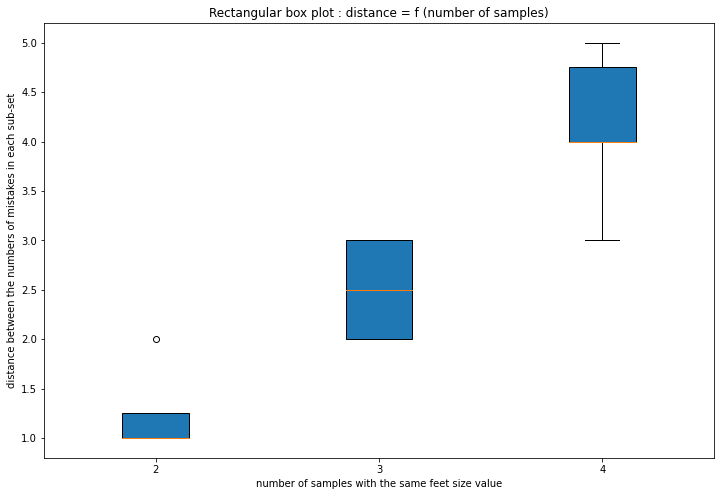

In [12]:
"""
Make a box plot reprensenting the variation of distances of number of mistakes (computed above) 
with respect to the size of the sub-sets represented by the number of samples (in terms of feet size value) countained in it
"""
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

# rectangular box plot
bplot1 = ax1.boxplot(feet_size_SAMPLES_DISTANCES,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=feet_size_SAMPLES_REDUCED)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot : distance = f (number of samples)')
plt.xlabel('number of samples with the same feet size value')
plt.ylabel('distance between the numbers of mistakes in each sub-set')

plt.show()

<span style="color:green">Comment</span> : The more samples we have for the feet size value, the more the distance of numbers of mistakes got larger.
Does this confirm the point of view in the beginning ; the size of the data-set is not big enough ? then, not sufficiently randomized ?